In [1]:
import sys
sys.path.extend(
    ['../generate_sequence/',
    '../lamination_database/']
)
from generate_sequence import get_best_laminate_random
from laminate_db import get_best_laminate
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure

In [2]:
# #t = 1.016
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 8
r, xi1D, xi3D, nplies = 0.5, -0.47913233, -0.04183533, 8
r, xi1D, xi3D, nplies = 1.0, -0.74205514,  0.48401028, 8
r, xi1D, xi3D, nplies = 1.5, -0.87087838,  0.74165676, 8
r, xi1D, xi3D, nplies = 2.0, -0.94734667,  0.89459334, 8
r, xi1D, xi3D, nplies = 2.5, -0.99798696,  0.99587392, 8

# #t = 1.524
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 12
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183668, 12
r, xi1D, xi3D, nplies = 1.0, -0.74205532,  0.48401064, 12
r, xi1D, xi3D, nplies = 1.5, -0.87087798,  0.74165596, 12
r, xi1D, xi3D, nplies = 2.0, -0.94734641,  0.89459281, 12
r, xi1D, xi3D, nplies = 2.5, -0.99798689,  0.99587378, 12

# #t = 2.032
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 16
r, xi1D, xi3D, nplies = 0.5, -0.47913146, -0.04183707, 16
r, xi1D, xi3D, nplies = 1.0, -0.74205528,  0.48401057, 16
r, xi1D, xi3D, nplies = 1.5, -0.87087769,  0.74165539, 16
r, xi1D, xi3D, nplies = 2.0, -0.94734671,  0.89459341, 16
r, xi1D, xi3D, nplies = 2.5, -0.99798709,  0.99587418, 16

# #t = 3.048
# #=========================
r, xi1D, xi3D, nplies = 0.0,  5.e-05, -1.e+00, 24
r, xi1D, xi3D, nplies = 0.5, -0.47913166, -0.04183667, 24
r, xi1D, xi3D, nplies = 1.0, -0.74205529,  0.48401058, 24
r, xi1D, xi3D, nplies = 1.5, -0.87087768,  0.74165535, 24
r, xi1D, xi3D, nplies = 2.0, -0.94734673,  0.89459346, 24
r, xi1D, xi3D, nplies = 2.5, -0.99798702,  0.99587404, 24

In [3]:
r, xi1D, xi3D, nplies = 1.0, -0.74205514,  0.48401028, 8

BEST SOLUTION IS
(0.29424299600176995, [90, -45, 0, 45, 45, 0, -45, 90])


[90, -45, 0, 45, 45, 0, -45, 90]

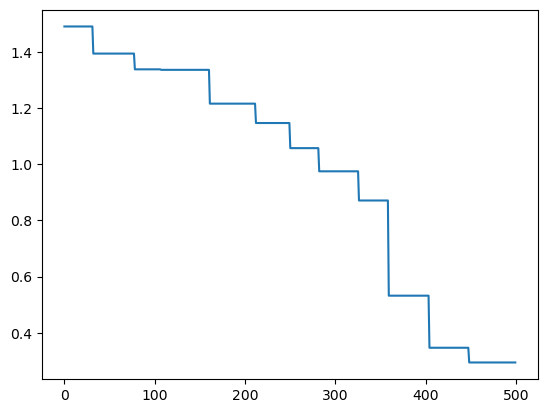

In [4]:
#get_best_laminate_random(xi1D, xi3D, n_plies, n_sequences=500, detailed=False)
t = 0.127
stack = get_best_laminate_random(xi1D, xi3D, nplies, detailed=True)
stack

In [5]:
stack2 = get_best_laminate((xi1D, xi3D), nplies)
stack2

[90, -45, 0, 45, 45, 0, -45, 90]

In [6]:
E1 = 128e3
E2 = 13e3
G12 = 6.4e3
v12 = 0.3
a = 508
b = 254
m = 10
n = 10
panel_constraint = 'PINNED'

Nxx = -1
Nyy = -1 * r
Nxy = -0


In [7]:
mat = OrthotropicMaterial(E1, E2, v12, G12, t)
lam = LaminateProperty(stacking=stack, plies=mat)
plate = PlateStructure(lam, a, b, panel_constraint, Nxx, Nyy, Nxy, m, n)

plate.buckling_analysis()

(array([1.19246686, 1.3459011 , 1.78090827, 2.47434715, 3.40432219]),
 array([[-1.40387202e+00,  2.39747642e+00,  2.12104741e+00,
          2.33223249e+00,  2.31003180e+00],
        [ 7.00474458e+00, -1.01969191e+01, -1.01695563e+01,
         -8.44316584e+00, -6.03470596e+00],
        [-4.39657056e-01,  3.54344247e-01,  9.10569056e-01,
          1.27526013e+00,  2.80860996e+00],
        [ 2.11809034e+00, -2.44052052e+00, -3.33202587e+00,
         -2.90414726e+00, -4.01462415e+00],
        [ 8.07107935e-01, -1.78243717e+00, -1.35682046e+00,
         -1.84784094e+00, -1.73671246e+00],
        [ 1.20774824e+00, -8.98523600e-01, -1.69742684e+00,
         -6.65435392e-01, -7.82479237e-01],
        [-4.66113506e-02, -4.48871460e-01,  1.19498305e-01,
         -3.02315375e-01,  1.17522984e-01],
        [-1.32656150e-01,  5.77618387e-01,  2.29492772e-01,
          5.68083267e-01,  2.02486959e-01],
        [-1.88902172e-01,  1.73304772e-01,  2.99401663e-01,
          1.42072929e-01,  1.68255507e

In [8]:
lam.xiD

array([-4.68750000e-01, -2.81250000e-01,  3.75000000e-01, -1.76042977e-16])

## Contour plot

In [9]:
import matplotlib.pyplot as plt

from composipy.optimize import maximize_buckling_load

generating plot...


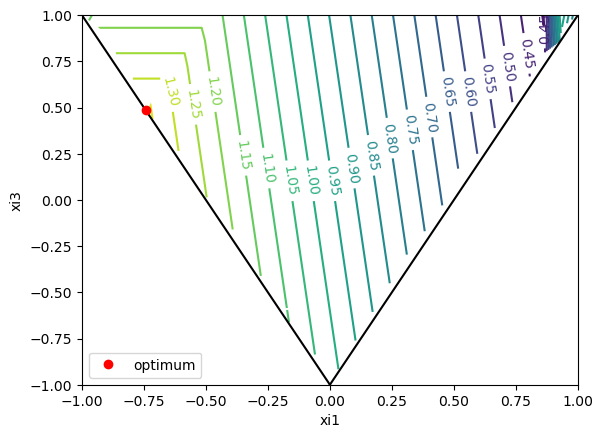

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.3627436214625144
       x: [-7.421e-01  4.840e-01]
     nit: 13
     jac: [ 5.819e-01  6.366e-02]
    nfev: 55
    njev: 13

In [10]:
maximize_buckling_load(a, b, nplies*0.127, E1, E2, v12, G12, Nxx, Nyy, Nxy, plot=True, points_to_plot=30)